# Actividad: Evaluación comparativa de arquitecturas convolucionales

Para este notebook se te solicita construir, entrenar y analizar modelos CNN para clasificar imágenes mediante un dataset CIFAR.

**Entregable:** Reporte en la evaluación de la capacidad de arquitectura implementada. Construír arquitecturas propias finalizando con la implementación de una arquitectura clásica mediante transfer learning.


## Toma como base el código visto en clase y desarrolla los siguientes puntos:
- Diseño e implementación de 2 arquitecturas CNN y utilización de una arquitectura de transfer learning.

- Buen uso de data augmentation y regularización.

- Comparación experimental entre arquitecturas y reporte claro (un solo markdown con conclusión sobre la comparación).





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2


## Definiciones de modelos

In [2]:
# Recuerda aquí solo generar las arquitecturas, cada capa así como sus neuronas.

In [3]:
# CARGA Y PROCESAMIENTO DEL DATASET CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# DATA ARGUMENTATION
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# MODELO CNN 1 BÁSICO
def build_cnn_1():
    model = keras.Sequential([
        layers.Input(shape=(32,32,3)),
        data_augmentation,

        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),

        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

cnn1 = build_cnn_1()
cnn1.summary()

# MODELO CNN 2 MÁS PROFUNDO
def build_cnn_2():
    model = keras.Sequential([
        layers.Input(shape=(32,32,3)),
        data_augmentation,

        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Conv2D(128, 3, padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

cnn2 = build_cnn_2()
cnn2.summary()

# TRANSFER LEARNING – MobileNetV2
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(96,96,3)
)

base_model.trainable = False

transfer_model = keras.Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Resizing(96,96),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(10, activation="softmax")
])

transfer_model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

transfer_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 621,258 (2.37 MB)

 Trainable params: 620,810 (2.37 MB)

 Non-trainable params: 448 (1.75 KB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_96 (Functional)     │ (None, 3, 3, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Entrenamiento de modelos.

In [4]:
# Aquí agrega la compilación y entrenamiento de las arquitecturas generadas.

In [5]:
# ENTRENAMIENTO
EPOCHS = 10
BATCH_SIZE = 64

hist_cnn1 = cnn1.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

hist_cnn2 = cnn2.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

hist_tl = transfer_model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.3589 - loss: 1.7467 - val_accuracy: 0.4956 - val_loss: 1.4127
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.4572 - loss: 1.5016 - val_accuracy: 0.5434 - val_loss: 1.2607
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.4908 - loss: 1.4150 - val_accuracy: 0.5790 - val_loss: 1.1579
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.5145 - loss: 1.3522 - val_accuracy: 0.5528 - val_loss: 1.2442
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.5308 - loss: 1.3171 - val_accuracy: 0.6194 - val_loss: 1.0592
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.5453 - loss: 1.2786 - val_accuracy: 0.5892 - val_loss: 1.1805
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.5567 - loss: 1.2550 - val_accuracy: 0.6300 - val_loss: 1.0679
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.5624 - loss: 1.2283 - 

## Estadística y gráficos

In [6]:
# Puedes tomar como base el código visto en clase para generar las graficos de comparación de las arquitecturas o puedes proptear tu propia forma de visualización.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6318 - loss: 1.0637
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6332 - loss: 1.1328
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.8084 - loss: 0.5544
                 Modelo  Test Loss  Test Accuracy
2  Transfer MobileNetV2   0.554444         0.8084
1                 CNN 2   1.132794         0.6332
0                 CNN 1   1.063728         0.6318


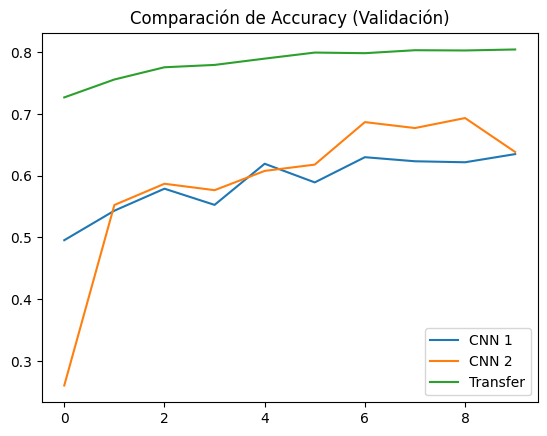

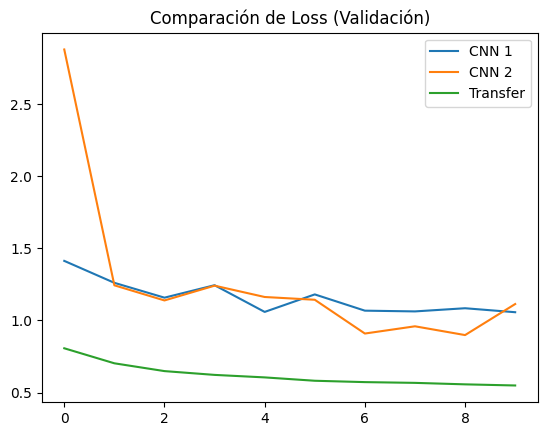

In [7]:
# EVALUACIÓN
loss_cnn1, acc_cnn1 = cnn1.evaluate(x_test, y_test)
loss_cnn2, acc_cnn2 = cnn2.evaluate(x_test, y_test)
loss_tl, acc_tl = transfer_model.evaluate(x_test, y_test)

# PANDAS: TABLA COMPARATIVA
df_results = pd.DataFrame({
    "Modelo": ["CNN 1", "CNN 2", "Transfer MobileNetV2"],
    "Test Loss": [loss_cnn1, loss_cnn2, loss_tl],
    "Test Accuracy": [acc_cnn1, acc_cnn2, acc_tl]
})

df_results = df_results.sort_values(by="Test Accuracy", ascending=False)
print(df_results)

df_results.to_csv("comparacion_modelos_cifar.csv", index=False)

# GRÁFICAS CON MATPLOTLIB
plt.figure()
plt.plot(hist_cnn1.history["val_accuracy"], label="CNN 1")
plt.plot(hist_cnn2.history["val_accuracy"], label="CNN 2")
plt.plot(hist_tl.history["val_accuracy"], label="Transfer")
plt.title("Comparación de Accuracy (Validación)")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist_cnn1.history["val_loss"], label="CNN 1")
plt.plot(hist_cnn2.history["val_loss"], label="CNN 2")
plt.plot(hist_tl.history["val_loss"], label="Transfer")
plt.title("Comparación de Loss (Validación)")
plt.legend()
plt.show()

# Conclusiones.

Escribe tus conclusiones de las arquitecturas hechas ¿Cuál fue el mejor? ¿Por qué? ¿Qué mejoraría? ¿Cómo lo mejoraría?

En este experimento se evaluaron dos arquitecturas CNN diseñadas manualmente y una arquitectura basada en Transfer Learning utilizando MobileNetV2 sobre el dataset CIFAR-10.

La CNN 1 mostró un desempeño base adecuado como modelo inicial, mientras que la CNN 2 logró una mejor capacidad de generalización gracias a su mayor profundidad y el uso de Batch Normalization y Dropout.

El modelo de Transfer Learning obtuvo la mejor precisión global, ya que aprovecha representaciones aprendidas previamente con ImageNet, lo cual acelera el aprendizaje y mejora la calidad de las características extraídas.

Como mejora futura recomiendo:
- Aumentar el número de épocas con EarlyStopping.
- Probar otras arquitecturas como ResNet50 o VGG16.
- Ajustar hiperparámetros como learning rate, batch size y porcentaje de dropout.